# 모델 저장과 콜백
---
## MNIST 딥러닝 모델
---
### MNIST 데이터셋
손으로 쓴 숫자들로 이루어진 이미지 데이터셋  
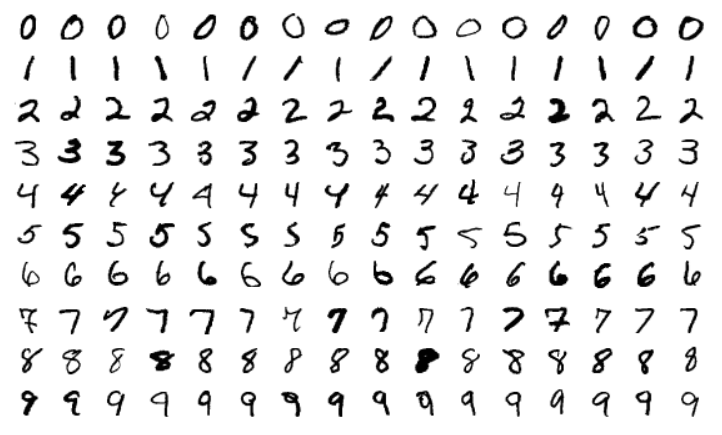  

#### 데이터 로드 및 전처리

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

In [2]:
# 케라스의 데이터셋에 내장되어 있는 tensorflow.keras.datasets.mnist를 임포트
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

'''
mnist.load_data : 데이터 로드
학습용 데이터: x_train_full, y_train_full 
테스트 데이터: x_test, y_test
'''
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')
'''
train_test_split() 함수
    x_train_full, y_train_full 데이터를 분리한다
    70% 학습용 : x_train와 y_train
    30% 검증용 : x_val와 y_val
'''
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


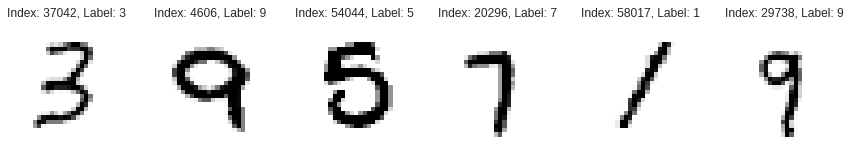

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

# 60,000개 중에서 6개만 랜덤으로 x_train_full과 y_train_full에서 추출하여 표시
num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

4


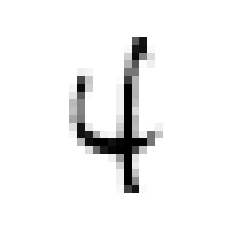

In [4]:
print(y_train[0])
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

### MNIST 데이터셋 전처리
#### x_train, x_val 그리고 x_test : 스케일링
- 이미지의 픽셀이 표현하는 값의 범위(0 ~ 255) 최대값인 255로 나누어 값을 0 ~ 1 사이의 범위로 스케일링

#### y_train, y_val, 그리고 y_test : 원-핫 인코딩
- 0부터 9까지의 숫자를 나타내는 레이블 : 총 10개의 값을 가지는 범주형
- utils.to_categorical을 이용해 원-핫 인코딩 수행 >> 정답에는 1을, 나머지의 값은 0을 부여

In [6]:
# 0 ~ 1 사이의 범위로 스케일링
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# 원-핫 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 모델 구성

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


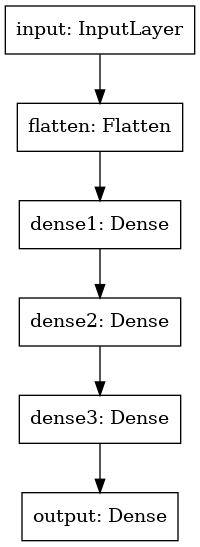

In [8]:
# Sequential() 함수를 이용해 순차적으로 레이어를 구성
model = models.Sequential()

# MNIST 데이터셋의 숫자 이미지가 28 x 28 사이즈
# 입력 객체로 keras.Input를 사용할 때, shape을 (28, 28)로 지정
model.add(keras.Input(shape=(28, 28), name='input'))

# 1차원으로 쭉 펼쳐주는 layers.Flatten 레이어를 사용
# 28 x 28 크기를 1차원으로 784 크기를 갖도록 변형
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))

# 활성화 함수로 relu를 사용하여 유닛수를 100, 64, 32으로 layers.Dense를 여러겹 쌓기 
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))

# MNIST의 숫자가 0부터 9까지 총 10개 
# 마지막 레이어에서는 전체 카테고리의 수인 10을 유닛수로 지정
# 활성화 함수는 softmax를 사용하여 각 카테고리별 확률 값을 구합니다.
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()
utils.plot_model(model)

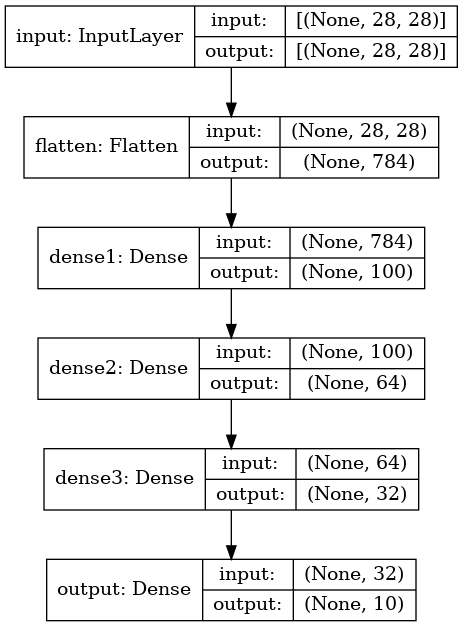

In [9]:
utils.plot_model(model, show_shapes=True)

### 모델 컴파일 및 학습

In [10]:
'''
손실 함수 : categorical_crossentropy
- 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

옵티마이저 : 가장 기본적인 sgd 지정

분류에 대한 성능을 확인하기 위한 지표 :  accuracy 지정
'''
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [11]:
'''
딥러닝 모델을 학습하기 위해 fit을 실행
- 학습데이터 : x_train, y_train 지정
- 학습 반복 수(epochs) : 40 지정
- 배치 사이즈(batch_size) : 128 지정
- 검증데이터(validation_data) : x_val, y_val 지정
'''
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 3s 4ms/step - loss: 1.7272 - accuracy: 0.5034 - val_loss: 1.0488 - val_accuracy: 0.7473
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.7313 - accuracy: 0.8161 - val_loss: 0.5732 - val_accuracy: 0.8431
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4817 - accuracy: 0.8682 - val_loss: 0.4476 - val_accuracy: 0.8635
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8879 - val_loss: 0.4030 - val_accuracy: 0.8806
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8989 - val_loss: 0.3506 - val_accuracy: 0.8972
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.9067 - val_loss: 0.3203 - val_accuracy: 0.9061
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3083 - accuracy: 0.9125 - val_loss: 0.3072 - val_accuracy: 0.9107
Epoch 

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

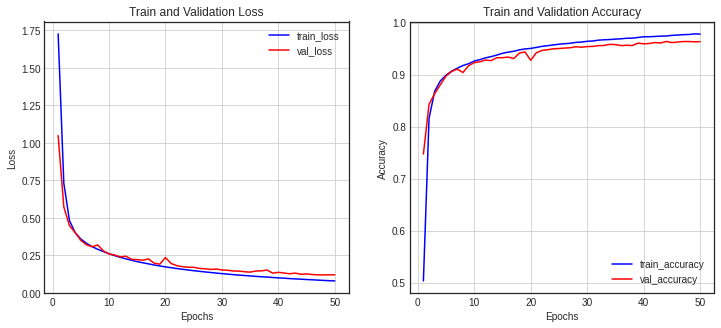

In [13]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9636


[0.11454109102487564, 0.9635999798774719]

In [15]:
'''
학습된 모델의 예측을 위해 x_test를 넣고, 
그에 대한 예측 결과를 받아서 0번째 결과만 확인
- 최종 레이어인 유닛 수 10개의 softmax를 활성화 함수로 통과한 결과인 것을 알 수 있다.
'''
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

(10000, 10)
[1.7678665e-05 5.7367544e-07 2.0101707e-04 5.2510377e-04 3.7950770e-07
 1.6314837e-06 5.3754795e-10 9.9917489e-01 2.1947222e-05 5.6819637e-05]


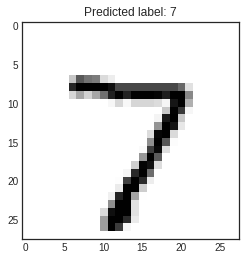

In [16]:
# 결과값 중에서 가장 큰 수가 있는 위치값을 np.argmax()
arg_pred_y = np.argmax(pred_ys, axis=1)

# 예측한 레이블 값 arg_pred_y[0]과 실제 숫자 이미지인 x_test[0]를 출력
plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [17]:
'''
모델이 제대로 분류를 수행했는지 알기 위해서 
사이킷런(Scikit-Learn)에 포함된 classification_report를 임포트해서 각종 지표들을 한눈에 살펴봅니다.
'''
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.94      0.97      0.96      1010
           4       0.94      0.97      0.96       982
           5       0.97      0.94      0.96       892
           6       0.97      0.95      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



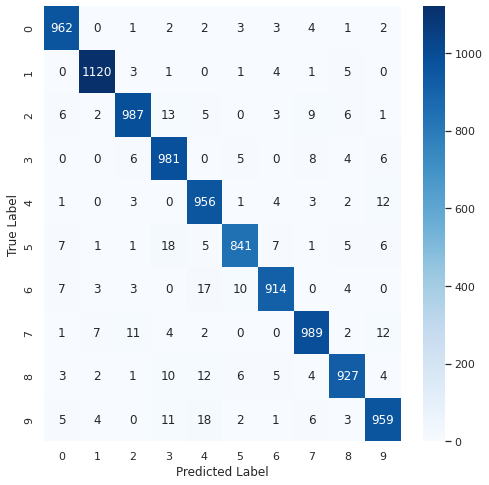

In [18]:
# 각 레이블 별로 분류가 얼마나 잘 수행되었는지 한눈에 살펴볼 수 있도록 혼동 행렬(Confusion Matrix)을 이용해 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---
## 모델 저장과 로드
---
모델을 열심히 학습시키고 저장을 안한다면 다시 처음부터 학습을 해야합니다. 즉, 어느 정도 학습이 되었다면 
추후에 모델을 사용하기 위해서 저장할 필요가 있습니다. 

**Sequencial API** 또는 **Functional API** 방식 모델
- save() : 모델 저장
- load_model() : 모델 로드

**Subclassing API** 방식 모델 : 가중치 저장
- save_weights() : 모델의 파라미터만 저장
- load_weights() : 모델의 파라미터만 로드

JSON 형식으로 모델을 저장 : to_json()  
JSON 파일로부터 모델을 로드 : model_from_json()  

YAML로 직렬화하여 저장 : to_yaml()  
YAML 파일로부터 모델을 로드 : model_from_yaml()  

In [19]:
# mnist_model.h5라는 이름으로 모델을 저장
model.save('mnist_model.h5')

In [20]:
# mnist_model.h5라는 이름의 모델을 로드
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 로드한 모델을 이용하여 예측하는 것이 가능
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

(10000, 10)
[1.7678665e-05 5.7367544e-07 2.0101707e-04 5.2510377e-04 3.7950770e-07
 1.6314837e-06 5.3754795e-10 9.9917489e-01 2.1947222e-05 5.6819637e-05]


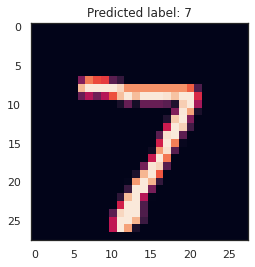

In [22]:
# 결과값 중에서 가장 큰 수가 있는 위치값을 np.argmax()
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

# 예측한 레이블 값 arg_pred_y[0]과 실제 숫자 이미지인 x_test[0]를 출력
plt.title(f'Predicted label: {arg_pred_y2[0]}')
plt.imshow(x_test[0])
plt.show()

{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "input"}}, {"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense1", "trainable": true, "dtype": "float32", "units": 100, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense2", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "Gl

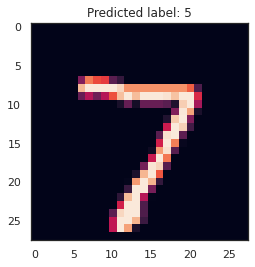

In [24]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()
print(model_json)

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

pred_ys3 = loaded_model.predict(x_test)
print(pred_ys3.shape)
print(pred_ys3[0])

#예측값 시각화하기
arg_pred_y3 = np.argmax(pred_ys3, axis=1)

#matlotlib를 이용해서 시각화하기
plt.title(f'Predicted label: {arg_pred_y3[0]}')
plt.imshow(x_test[0])
plt.show()

---
## 콜백(Callback)
---
### ModelCheckpoint
정기적으로 모델의 체크포인트를 저장하고 문제 발생시 복구에 사용

In [25]:
from tensorflow.keras import callbacks
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0870 - accuracy: 0.9748
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0802 - accuracy: 0.9775
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0750 - accuracy: 0.9784
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9803
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.9828
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0563 - accuracy: 0.9835
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9852
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9865
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.044

In [26]:
# 최상의 모델만을 저장하는 옵션으로 save_best_only=True를 지정
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0419 - accuracy: 0.9889 - val_loss: 0.1028 - val_accuracy: 0.9693
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0386 - accuracy: 0.9897 - val_loss: 0.1151 - val_accuracy: 0.9664
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0358 - accuracy: 0.9905 - val_loss: 0.1024 - val_accuracy: 0.9698
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0336 - accuracy: 0.9910 - val_loss: 0.1044 - val_accuracy: 0.9703
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0311 - accuracy: 0.9914 - val_loss: 0.1031 - val_accuracy: 0.9706
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0286 - accuracy: 0.9927 - val_loss: 0.1068 - val_accuracy: 0.9704
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0265 - accuracy: 0.9932 - val_loss: 0.1050 - val_accuracy:

### EarlyStopping
검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용  
patiance 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈추게 됨  
모델이 향상되지 않으면 학습이 자동으로 중지 : epochs를 크게 설정 가능  
학습이 끝난 후의 최상의 가중치를 복원함 : 모델을 따로 복원할 필요가 없음

In [27]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0193 - accuracy: 0.9954 - val_loss: 0.1112 - val_accuracy: 0.9689
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0180 - accuracy: 0.9957 - val_loss: 0.1184 - val_accuracy: 0.9679
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0164 - accuracy: 0.9965 - val_loss: 0.1079 - val_accuracy: 0.9714
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.1042 - val_accuracy: 0.9723
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0138 - accuracy: 0.9972 - val_loss: 0.1141 - val_accuracy: 0.9699
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0129 - accuracy: 0.9976 - val_loss: 0.1092 - val_accuracy: 0.9717
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0117 - accuracy: 0.9982 - val_loss: 0.1088 - val_accuracy:

### LearningRateScheduler
최적화를 하는 동안 학습률을 동적으로 변경할 때 사용

In [28]:
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)
    
round(model.optimizer.lr.numpy(), 5)

0.01

In [29]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

### Tensorboard
모델의 경과를 모니터링할 때 사용  
텐서보드를 이용하여 학습과정을 모니터링하기 위해서 logs 폴더를 만들어 학습이 진행되는 동안 로그 파일을 생성  
텐서보드에는 효율적인 모니터링을 위해서 여러가지 기능들을 제공

In [30]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0042 - accuracy: 0.9999 - val_loss: 0.1164 - val_accuracy: 0.9724
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.1171 - val_accuracy: 0.9718
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.1172 - val_accuracy: 0.9723
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.1179 - val_accuracy: 0.9718
Epoch 5/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.9723
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1186 - val_accuracy: 0.9726
Epoch 7/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: